In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import gradio as gr
from PIL import Image

In [3]:
testpath=r'C:\Users\admin\Desktop\AICTE INTERNSHIP\modified-dataset\test'
trainpath=r'C:\Users\admin\Desktop\AICTE INTERNSHIP\modified-dataset\train'
validpath=r'C:\Users\admin\Desktop\AICTE INTERNSHIP\modified-dataset\val'

In [5]:
datatrain=tf.keras.utils.image_dataset_from_directory(trainpath,shuffle=True,image_size=(128,128),batch_size=32,validation_split=False)

Found 2400 files belonging to 10 classes.


In [7]:
datatest=tf.keras.utils.image_dataset_from_directory(testpath,shuffle=False,image_size=(128,128),batch_size=32,validation_split=False)

Found 300 files belonging to 10 classes.


In [9]:
datavalid=tf.keras.utils.image_dataset_from_directory(validpath,shuffle=True,batch_size=32,image_size=(128,128),validation_split=False)

Found 300 files belonging to 10 classes.


In [11]:
class_names = datatrain.class_names
print(len(class_names))
print(class_names)

10
['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']


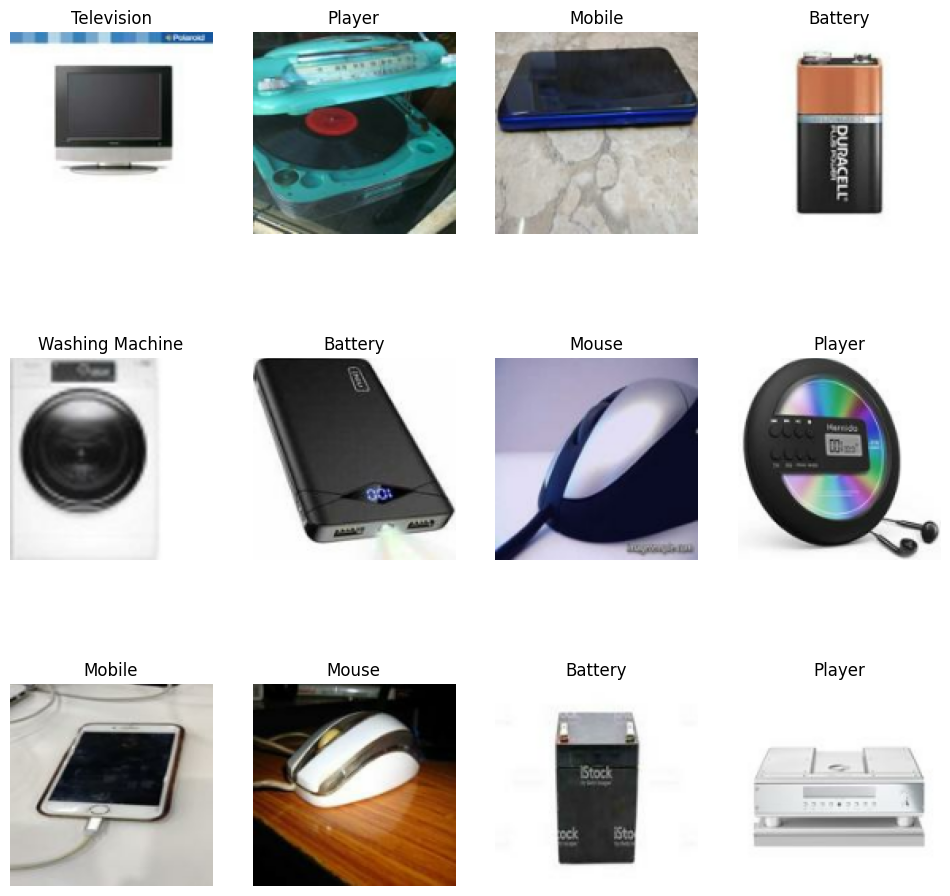

In [13]:
plt.figure(figsize=(12,12))
for images, labels in datatrain.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [49]:
def plot_class_distribution(dataset, title="Class Distribution"):
   
    class_counts = {}  

    
    for images, labels in dataset:
        for label in labels.numpy():
            class_name = dataset.class_names[label]  
            class_counts[class_name] = class_counts.get(class_name, 0) + 1
    class_names = list(class_counts.keys())  
    counts = list(class_counts.values())
          # Plot
    plt.figure(figsize=(8, 6))  
    plt.bar(class_names, counts, color='r',edgecolor='k')  
    plt.xlabel("Class")  
    plt.ylabel("Number of Items")  
    plt.title(title)  
    plt.xticks(rotation=45)  
    plt.tight_layout()  
    plt.show()     

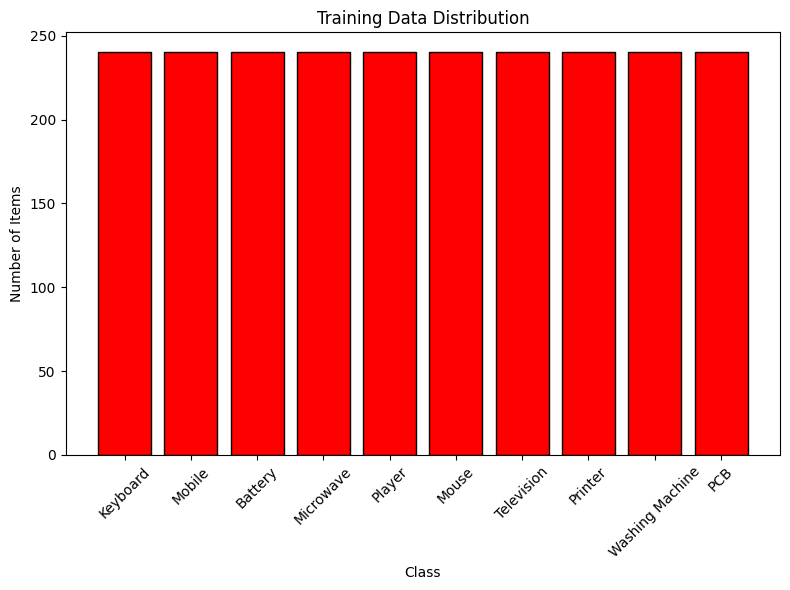

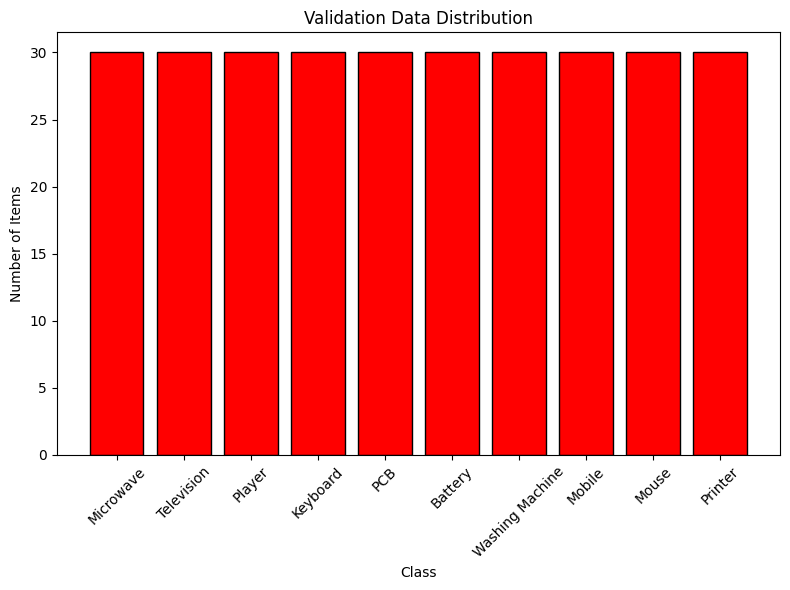

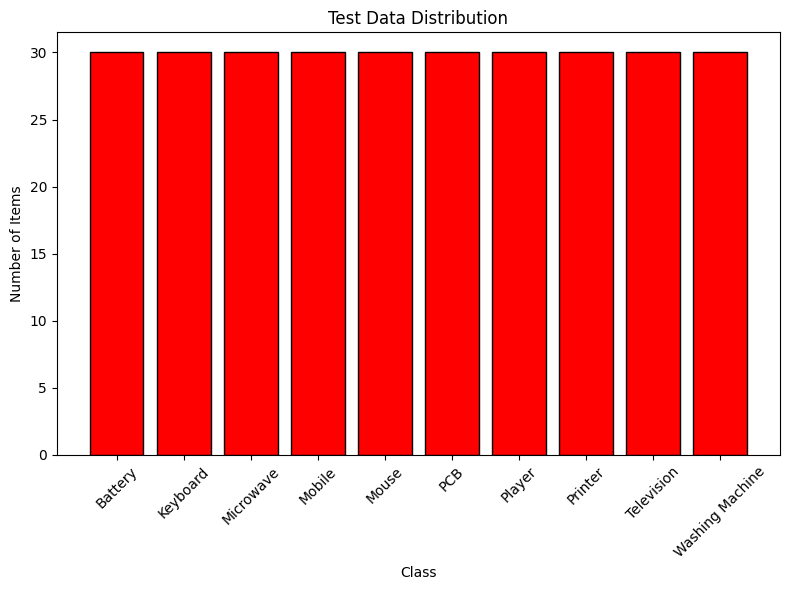

In [51]:
plot_class_distribution(datatrain, "Training Data Distribution")
plot_class_distribution(datavalid, "Validation Data Distribution")
plot_class_distribution(datatest, "Test Data Distribution")

In [53]:
# Data Preprocessing 
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])